<div style="">
<img src="logo.jpg", width=150, ALIGN="left", border=20>
<h1>Starting Kit for Data Science Africa challenge </h1>
<br>This code was tested with <br>
Python 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) (https://anaconda.org/)<br>
<i> Adapted for Chalab by Isabelle Guyon from original code of Balázs Kégl</i> <br>
<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science (CDS)</a>
</center>
<p>
</div>

<div style="">
    <h1>Introduction </h1>
</div>

In [1]:
model_dir = 'sample_code_submission/'                        # Change the model to a better one once you have one!
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from data_io import read_as_df
import numpy as np
from matplotlib import pyplot as plt
from data_manager import DataManager

In [2]:
data_dir = 'sample_data'
data_name = 'microscopy'
!ls $data_dir*

microscopyCount_feat.name	microscopy_feat.name
microscopyCount_label.name	microscopy_label.name
microscopyCount_private.info	microscopy_private.info
microscopyCount_public.info	microscopy_public.info
microscopyCount_test.data	microscopy_test.data
microscopyCount_test.solution	microscopy_test.solution
microscopyCount_train.data	microscopy_train.data
microscopyCount_train.solution	microscopy_train.solution
microscopyCount_valid.data	microscopy_valid.data
microscopyCount_valid.solution	microscopy_valid.solution


<div>
    <h1> Step 1: Patch Classification </h1>
<p>
The goal for this step is to create a model in order model in order to classify either a patch contains parasite or not.
</p>
</div>

### 1.1 Introduction

Below are some example of class of positive and negative classes. 

In [3]:
data = read_as_df(data_dir  + '/' + data_name)                # The data are loaded as a Pandas Data Frame

Reading sample_data/microscopy_train from AutoML format
Number of examples = 24548
Number of features = 4800
      Class
0  negative
1  positive
Number of classes = 2


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


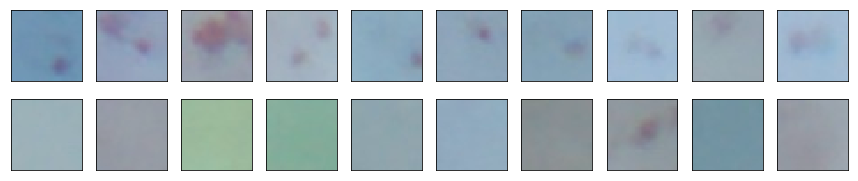

In [4]:
N_samples_to_display = 10

train_X = data.drop(["target"], 1)
pos_indices = data[data.target == "positive"].drop(["target"], 1).index
pos_indices = pos_indices[np.random.permutation(len(pos_indices))]

for i in range(N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_pos = train_X.loc[pos_indices[i], :]
    example_pos = np.reshape(list(example_pos), (40, 40, 3))
    #example_pos = np.swapaxes(example_pos,0,2)
    plt.imshow(example_pos)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

neg_indices = data[data.target == "negative"].drop(["target"], 1).index
neg_indices = neg_indices[np.random.permutation(len(neg_indices))]
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = train_X.loc[neg_indices[i], :]
    example_neg = np.reshape(list(example_neg), (40, 40, 3))
    plt.imshow(example_neg)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

plt.gcf().set_size_inches(1.5*N_samples_to_display,3)

### 1.2 Load DataManager
This section reads data (Train, Valid, Test) and its solutions using DataManager. <span style="color:red"> Please note that we are only working on sample data at the moment. </span>

In [5]:
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : /home/aux/sample_data/microscopy_public.info
DataManager : microscopy
info:
	usage = Sample dataset Microscopy data
	name = microscopy
	task = binary.classification
	target_type = Numerical
	feat_type = Numerical
	metric = auc_binary
	time_budget = 1200
	feat_num = 4800
	target_num = 1
	label_num = 1
	train_num = 500
	valid_num = 500
	test_num = 500
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(24548, 4800)
	Y_train = array(24548,)
	X_valid = array(11523, 4800)
	Y_valid = array(11523,)
	X_test = array(11732, 4800)
	Y_test = array(11732,)
feat_type:	array(4800,)
feat_idx:	array(0,)



### 1.3 Training a predictive model
We provide an example of predictive model for classification in the `sample_code_submission/model.py` directory. It is a simple deep neural network with three convolutional layer.

In [6]:
from data_io import write
from model import model
# Uncomment the next line to show the code of the model
#??model 

In [7]:
M = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
#M = M.load(trained_model_name)                  

<div>
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [8]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
M.fit(X_train, Y_train)

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

Epoch 1/5
24548/24548 [==============================] - 24s 966us/sample - loss: 0.5906 - accuracy: 0.6936
Epoch 2/5
24548/24548 [==============================] - 24s 958us/sample - loss: 0.3838 - accuracy: 0.8595
Epoch 3/5
24548/24548 [==============================] - 24s 984us/sample - loss: 0.3452 - accuracy: 0.8819
Epoch 4/5
24548/24548 [==============================] - 24s 981us/sample - loss: 0.3246 - accuracy: 0.8927
Epoch 5/5
24548/24548 [==============================] - 25s 1ms/sample - loss: 0.3191 - accuracy: 0.8926


In [9]:
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
result_name_ = result_name + "_"
!ls $result_name_*

sample_result_submission/microscopy_test.predict
sample_result_submission/microscopy_train.predict
sample_result_submission/microscopy_valid.predict


### 1.4 Scoring the results
The metric used in this step is the Area Under the Curve of ROC. This section reports the performance on Train, Valid, Test set of the sample data.

In [10]:
from sklearn.metrics import roc_auc_score
metric_name, scoring_function = "auc_binary", roc_auc_score
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
#??scoring_function

Using scoring metric: auc_binary


In [11]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Valid score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_valid'], Y_hat_valid))
print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_test'], Y_hat_test))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the auc_binary metric = 0.9463
Valid score for the auc_binary metric = 0.9397
Test score for the auc_binary metric = 0.9383
Ideal score for the auc_binary metric = 1.0000


### 1.5 Save submission
In this section, we store predictions into `result_dir`

In [12]:
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
result_name_ = result_name + "_"
!ls $result_name_*

sample_result_submission/microscopy_test.predict
sample_result_submission/microscopy_train.predict
sample_result_submission/microscopy_valid.predict


<div>
<h1> Step 2: Count Regression </h1>

<p>The goal of this section is to predict the number of parasite in one image (using previous patch classification model).</p>
</div>

In [13]:
data_name = 'microscopyCount'

### 2.1 Few illustration and load data

In [14]:
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : /home/aux/sample_data/microscopyCount_public.info
DataManager : microscopyCount
info:
	usage = Sample dataset Microscopy data
	name = microscopyCount
	task = regression
	target_type = Numerical
	feat_type = Numerical
	metric = r2_regression
	time_budget = 1200
	feat_num = 1687500
	target_num = 1
	label_num = 1
	train_num = 10
	valid_num = 10
	test_num = 10
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(30, 1687500)
	Y_train = array(30,)
	X_valid = array(30, 1687500)
	Y_valid = array(30,)
	X_test = array(30, 1687500)
	Y_test = array(30,)
feat_type:	array(1687500,)
feat_idx:	array(0,)



Text(0.5, 1.0, 'Number of parasites in images: 42 parasites')

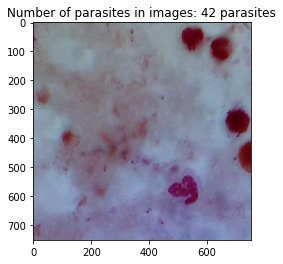

In [15]:
idx_example = 3 # Need to be less than 10 (only on sample data)
plt.imshow(D.data["X_train"][idx_example, :].reshape(750, 750, 3) / 255)
plt.title("Number of parasites in images: {} parasites".format(int(D.data["Y_train"][idx_example])))

### 2.2 Training a predictive model
We provide an example of predictive model for classification in the `sample_code_submission/model_count.py` directory. It is a simple sliding window of previous classification model then applying non maximum suppression to discard conflicting patches.

In [24]:
from data_io import write
from model_count import model_count
# Uncomment the next line to show the code of the model
??model_count

In [25]:
M_pred = model_count(M)
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
#M = M.load(trained_model_name)                  

In [26]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']
M_pred.fit(X_train, Y_train)

Y_hat_train = M_pred.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M_pred.predict(D.data['X_valid'])
Y_hat_test = M_pred.predict(D.data['X_test'])

### 2.3 Scoring the results
The metric used in this setting is the R-Squared.

In [27]:
from sklearn.metrics import r2_score
metric_name, scoring_function = "r2_regression", r2_score
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric

Using scoring metric: r2_regression


In [28]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Valid score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_valid'], Y_hat_valid))
print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_test'], Y_hat_test))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the r2_regression metric = -2.7445
Valid score for the r2_regression metric = -6.9307
Test score for the r2_regression metric = -0.3886
Ideal score for the r2_regression metric = 1.0000


### 2.4 Save submission

In [29]:
#M.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/microscopyCount_test.predict
sample_result_submission/microscopyCount_train.predict
sample_result_submission/microscopyCount_valid.predict


# Step 3: Making a submission 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.

We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
    <span style="color:red"> Just change the data name in the block below. In the rest of the section, replace the sample plots by anything you want. </span>

In [ ]:
data_dir = 'sample_data'              # Change this to the directory where you put the input data

In [ ]:
!python3 $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

<div style="background:#FFFFAA">
Also test the scoring program:
    </div>

In [30]:
scoring_output_dir = 'scoring_output'
!source activate python3; python3 $score_dir/score.py $data_dir $result_dir $scoring_output_dir

/bin/sh: 1: source: not found
======= Set 1 (Microscopycount_test): r2_regression(set1_score)=-0.388623119693 =======
======= Set 2 (Microscopycount_train): r2_regression(set2_score)=-2.744530441329 =======
======= Set 3 (Microscopycount_valid): r2_regression(set3_score)=-6.930680409175 =======
======= Set 4 (Microscopy_test): auc_binary(set4_score)=0.876637920907 =======
======= Set 5 (Microscopy_train): auc_binary(set5_score)=0.892684806550 =======
======= Set 6 (Microscopy_valid): auc_binary(set6_score)=0.879399851268 =======


<div style="background:#FFFFAA">
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [ ]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)